This notebook walks through an example of performing our proposed clustering on a DHN. 

In [1]:
# First we need the task-driven distance metrics values
# Note that to compute these distances, the physical states of the DHN are necessary. However, they have been made already available.

# Import packages
from src.dhnv2 import *
from src.utils import *
from src.helpers import *
# from src.clustering import ClusteringDHN
from src.clusteringV2 import ClusteringNew


Creating a ClusteringDHN object

This object requires **two major arguments**: 

    - dhn: (DistrictHeatingNetworkFromExcel) object containing the graph and physical descriptions of the DHN
    
    - producers: (list) indexes of the sources nodes


However, here in this demonstration, we have already saved all the distance metrics and therefore the dhn and sources information are not needed anymore.

In [2]:
import pickle as pkl 
file_path = os.path.join('pickled_dhns', f'dhn{1}.pkl')
with open(file_path, 'rb') as f:
    dhn = pkl.load(f)

In [3]:
dhn

In [4]:
# Read the clustering object
clustering_obj = ClusteringNew(dhn_indicator=1, dhn=dhn, producers=[0,56]) # dhn and sources may not be none if available and requires the physical states

Here, we perform the clustering. Defined values of the hyperparameters are required.

In [5]:
# Hyperparameters
delta = 0.8
alpha = 0.5

# Performing the clustering
clusters, list_clusters = clustering_obj.hierarchical_clustering_graph(delta, alpha)

Formed clusters: [[0], [1], [2], [3], [4], [5], [6], [7], [8], [9], [10], [11], [12], [13], [14], [15], [16], [17], [18], [19], [20], [21], [22], [23], [24], [25], [26], [27], [28], [29], [30], [31], [32], [33], [34], [35], [36], [37], [38], [39], [40], [41], [42], [43], [44], [45], [46], [47], [48], [49], [50], [51], [52], [53], [54], [55], [56], [57], [58], [59], [60], [61], [62], [63], [64], [65], [66], [67], [68], [69], [70]] with distance 0.19674584474094114
Formed clusters: [[0], [1], [2], [3], [4], [5], [6], [7], [8], [9], [10], [11], [12], [13], [14], [15], [16], [17], [18], [19], [20], [21], [22], [23], [24], [25], [26], [27], [28], [29], [30], [31], [32], [33], [34], [35], [36], [37], [38], [39], [40], [41], [42], [43], [44], [45], [46], [47], [48], [49], [50], [51], [52], [53], [54], [55], [56], [57], [58], [59], [60], [61], [62], [63], [64], [65], [67], [68], [69], [66, 70]] with distance 0.24754840248948856
Formed clusters: [[0], [1], [2], [3], [4], [5], [6], [7], [8], [9]

In [6]:
from src.helpers import show_cluster_in_parent_dhn

In [7]:
clusters = [[0],
 [10],
 [11],
 [15],
 [56],
 [8, 9],
 [29,
  65,
  59,
  18,
  20,
  69,
  19,
  68,
  37,
  43,
  61,
  16,
  17,
  35,
  36,
  38,
  47,
  46,
  48,
  39,
  30,
  31,
  67,
  32,
  66,
  70],
 [3,
  34,
  1,
  2,
  4,
  25,
  41,
  27,
  28,
  52,
  26,
  40,
  53,
  33,
  54,
  57,
  58,
  42,
  64,
  24,
  23,
  51,
  14,
  22,
  12,
  13,
  50,
  55,
  44,
  45,
  63,
  60,
  62,
  7,
  49,
  6,
  5,
  21]]

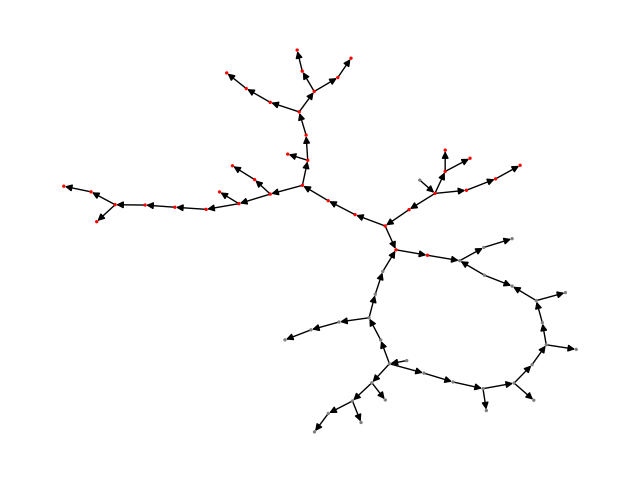

In [8]:
show_cluster_in_parent_dhn([i+1 for i in clusters[7]], clustering_obj.graph, clustering_obj.dhn)

In [9]:
clustering_obj.compute_clustering_metrics([cl for cl in clusters if len(cl)>=2])

({'mean_size': np.float64(22.0),
  'mean_cluster_has_loop': np.float64(0.0),
  'mean_density': np.float64(0.18825910931174086),
  'mean_internal_degree': np.float64(21.0),
  'mean_scaled_density': np.float64(1.0),
  'mean_nodes_mean_internal_indegree': np.float64(0.8117408906882592),
  'mean_nodes_sum_internal_indegree': np.float64(21.0),
  'mean_nodes_max_internal_indegree': np.float64(1.0),
  'mean_nodes_mean_internal_outdegree': np.float64(0.8117408906882592),
  'mean_nodes_sum_internal_outdegree': np.float64(21.0),
  'mean_nodes_max_internal_outdegree': np.float64(2.3333333333333335),
  'mean_nodes_mean_internal_degree': np.float64(1.6234817813765183),
  'mean_nodes_sum_internal_degree': np.float64(42.0),
  'mean_nodes_max_internal_degree': np.float64(2.3333333333333335),
  'mean_average_outdegree_fraction': np.float64(0.028002699055330635),
  'mean_max_outdegree_fraction': np.float64(0.6666666666666666),
  'mean_average_indegree_fraction': np.float64(0.19264507422402158),
  'mean_

In [ ]:
print('Nodes of the formed clusters: ')
for cl in clusters:
    if len(cl) > 1:
        print('  ', [i+1 for i in cl])

In [10]:
df_ = pd.DataFrame(data=np.zeros(shape=(8,2)), columns=['test1', 'test2'])

In [17]:
df_.mean().index

Index(['test1', 'test2'], dtype='object')

In [20]:
for el in df_.mean().index:
    print(df_.mean()[el])

0.0
0.0
